# NYC Taxi Trip Duration Prediction
***
**Elior Shriki** 313586281

**Aviv Shabtay** 313583619

**Miriam Assraf** 200059939

<img src='https://i.imgur.com/GNbWoOk.jpg' align="left"/>

# Research overview
* Our goal is to find a model to predict the trip time duration of taxi trips in New York City.
* We used the dataset from the competition: `2016 NYC Yellow Cab trip record data`.
* We followed of work of other researchers who wrote the article: `Travel Time Prediction using Tree-Based Ensembles` which was about predicting similar problem (Time travel or Taxi).

![taxi](https://user-images.githubusercontent.com/20494368/103377004-cdc36400-4ae6-11eb-862e-c017e77d91dc.png)

### Motivation
Predicting the Trip time duration could help in: 
* Planning ahead tourist trips
* Increase customer experience and satisfaction
* Improve transportation services such as: Uber or Lyft
* Decreasing the load in the roads and more !

![uber_lyft_customer](https://user-images.githubusercontent.com/20494368/103377703-cb620980-4ae8-11eb-9e0b-e1fad13f6a38.png)

### Kaggle competition overview
* When the competition was active the reward was about 30,000$ for winning.
* The competition forces researchers to use RMSLE error for the validation the model.

![coins](https://user-images.githubusercontent.com/20494368/103377043-f2b7d700-4ae6-11eb-890b-ee8f26919555.png)

### Main methodology

1. Data exploration
2. Feature engineering
3. Data manipulation - encoding, cleaning, clustring, etc.
4. Train the models - XgBoost, LightGBM
5. Pick the best model

![method_chart](https://user-images.githubusercontent.com/20494368/103378147-09abf880-4aea-11eb-9b95-de5dbcfc82ab.png)


### Notes from the artical:
* Weather could affect on the traffic.
* Routing data could be affected by rush hours.
* Predictions could be tested for long-term predictions and for a short-term predictions.
* Most of the mcahine learning models nowdays using SVM, KNN, Neural networks and not Tree-Based-Learning.
* Tree based learning considered as robust method that should be tested to solve this problem and discover new achivments.

![trees](https://user-images.githubusercontent.com/20494368/103399658-bae27b00-4b4a-11eb-97d0-472eca7406cf.png)

### Robust the research
* We tried to use Colab for the analysis, which was a failure.
* We migrated the analysis to 3 Server using Amazon AWS Services.
* Each Service deploy JupyterLab service which have trained different model.
* Latter we summary the results to one notebook.

![aws](https://user-images.githubusercontent.com/20494368/103401126-6b06b280-4b50-11eb-94f0-1431c3caa624.png)

<a id=path></a>
## Set Local Path
We need to set the local path to read and write to the file.

In [1]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab - Remove sample data')
  !rm -r sample_data
else:
  print('Not running on CoLab - Continue')

Not running on CoLab - Continue


# Import dataset from Amazon S3 storage

In [2]:
!wget https://seminar-ml-2020.s3.amazonaws.com/NYC_DS_After.zip -P ./datasets
!unzip ./datasets/NYC_DS_After.zip -d ./datasets
!rm ./datasets/NYC_DS_After.zip

--2021-01-12 21:23:56--  https://seminar-ml-2020.s3.amazonaws.com/NYC_DS_After.zip
Resolving seminar-ml-2020.s3.amazonaws.com (seminar-ml-2020.s3.amazonaws.com)... 52.217.49.4
Connecting to seminar-ml-2020.s3.amazonaws.com (seminar-ml-2020.s3.amazonaws.com)|52.217.49.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177761819 (170M) [application/zip]
Saving to: ‘./datasets/NYC_DS_After.zip’

NYC_DS_After.zip    100%[===================>] 169.53M  78.8MB/s    in 2.2s    

2021-01-12 21:23:58 (78.8 MB/s) - ‘./datasets/NYC_DS_After.zip’ saved [177761819/177761819]

Archive:  ./datasets/NYC_DS_After.zip
  inflating: ./datasets/train_ds.csv  
  inflating: ./datasets/test_ds.csv  


<a id=timer></a>
## Set timer

In [3]:
from time import perf_counter
start = perf_counter()

<a id=library></a>
## Import libraries

In [4]:
!pip install -q kaggle

In [5]:
!pip install -q graphviz

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
from tqdm import tqdm
!pip install -q xgboost
import xgboost as xgb

from xgboost import plot_tree
import statsmodels.api as sm
import os

<a id=data></a>
## Import Dataset

In [7]:
nyc_taxi_train_df=pd.read_csv("./datasets/train_ds.csv", index_col = "id")
nyc_taxi_test_df=pd.read_csv("./datasets/test_ds.csv", index_col = "id")

In [8]:
nyc_taxi_train_df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,weekday,hour,minute,...,HDD,CDD,precipitation,snow fall,snow depth,kmeans_pickup,kmeans_dropoff,num_rides_by_pickup_group,num_rides_by_dropoff_group,trip_duration
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,-73.982155,40.767937,-73.964630,40.765602,0,3,0,17,24,...,19,0,0.29,0.0,0.0,1,0,758,745,455.0
id1226973,1,-73.984711,40.759007,-73.991318,40.750095,0,3,0,17,52,...,19,0,0.29,0.0,0.0,1,0,758,745,358.0
id2017735,2,-73.994209,40.751411,-73.977997,40.754959,0,3,0,17,26,...,19,0,0.29,0.0,0.0,1,0,758,745,549.0
id2856105,1,-73.984856,40.773968,-73.994781,40.761066,0,3,0,17,55,...,19,0,0.29,0.0,0.0,1,0,758,745,784.0
id2836996,1,-73.977898,40.759823,-73.979340,40.757935,0,3,0,17,16,...,19,0,0.29,0.0,0.0,1,0,758,745,670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2457812,1,-73.929634,40.760757,-73.865875,40.753941,0,5,3,2,58,...,13,0,0.00,0.0,0.0,0,1,37,37,753.0
id0376233,2,-73.940376,40.751068,-73.897202,40.712639,0,5,3,2,51,...,0,3,0.00,0.0,0.0,0,1,37,37,1039.0
id3416877,2,-73.950523,40.779690,-73.891731,40.855377,0,5,3,2,27,...,0,3,0.00,0.0,0.0,0,1,37,37,1061.0


In [9]:
nyc_taxi_train_df[['trip_duration']].describe()

,trip_duration
count,1.438177e+06
mean,8.350762e+02
std,6.454507e+02
min,6.100000e+01
25%,4.000000e+02
50%,6.630000e+02
75%,1.069000e+03
max,7.191000e+03


In [10]:
nyc_taxi_test_df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,weekday,hour,minute,...,departure,HDD,CDD,precipitation,snow fall,snow depth,kmeans_pickup,kmeans_dropoff,num_rides_by_pickup_group,num_rides_by_dropoff_group
id,,,,,,,,,,,,,,,,,,,,,
id3004672,1,-73.988129,40.732029,-73.990173,40.756680,0,6,3,23,59,...,0.9,0,11,0.0,0.0,0.0,0,0,295.0,760
id3505355,1,-73.964203,40.679993,-73.959808,40.655403,0,6,3,23,59,...,0.9,0,11,0.0,0.0,0.0,0,5,295.0,248
id1217141,1,-73.997437,40.737583,-73.986160,40.729523,0,6,3,23,59,...,0.9,0,11,0.0,0.0,0.0,0,5,295.0,248
id2150126,1,-73.956070,40.771900,-73.986427,40.730469,0,6,3,23,59,...,0.9,0,11,0.0,0.0,0.0,3,5,847.0,248
id1598245,1,-73.970215,40.761475,-73.961510,40.755890,0,6,3,23,59,...,0.9,0,11,0.0,0.0,0.0,3,0,847.0,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id3008929,1,-74.003464,40.725105,-74.001251,40.733643,0,1,4,0,2,...,4.6,27,0,0.0,0.0,0.0,0,5,267.0,195
id3700764,1,-74.006363,40.743782,-73.953407,40.782467,0,1,4,0,1,...,4.6,27,0,0.0,0.0,0.0,0,4,267.0,381
id2568735,2,-73.972267,40.759865,-73.876602,40.748665,0,1,4,0,1,...,4.6,27,0,0.0,0.0,0.0,3,4,659.0,381


## Boosting Trees
***
With a regular machine learning model, like a decision tree, we’d simply train a single model on our dataset and use that for prediction. 

We might play around with the parameters for a bit or augment the data, but in the end we are still using a single model. Even if we build an ensemble, all of the models are trained and applied to our data separately.

Boosting, on the other hand, takes a more iterative approach. It’s still technically an ensemble technique in that many models are combined together to perform the final one, but takes a more clever approach.

Rather than training all of the models in isolation of one another, boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones. Models are added sequentially until no further improvements can be made.

The advantage of this iterative approach is that the new models being added are focused on correcting the mistakes which were caused by other models. In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes!

**Gradient Boosting** specifically is an approach where new models are trained to predict the residuals (i.e errors) of prior models.
Gradient Boosting involves creating and adding decision trees to an ensemble model sequentially. New trees are created to correct the residual errors in the predictions from the existing ensemble.
<img src='https://user-images.githubusercontent.com/12760721/103373634-1de9f880-4ade-11eb-8c80-972f52c8fa52.png' align="left"/>

<a id=xgboost></a>
## XGBoost Regressor
***
XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. 

It uses gradient boosting (GBM) framework at core. 

It belongs to a family of boosting algorithms that convert weak learners into strong learners. A weak learner is one which is slightly better than random guessing.

'Boosting' here is a sequential process; i.e., trees are grown using the information from a previously grown tree one after the other. This process slowly learns from data and tries to improve its prediction in the subsequent iterations.

DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.

Due to the nature of an ensemble, i.e having several models put together to form what is essentially a very large complicated one, makes this technique prone to overfitting. The eta parameter gives us a chance to prevent this overfitting
The eta can be thought of more intuitively as a learning rate. Rather than simply adding the predictions of new trees to the ensemble with full weight, the eta will be multiplied by the residuals being adding to reduce their weight. This effectively reduces the complexity of the overall model.
It is common to have small values in the range of 0.1 to 0.3. The smaller weighting of these residuals will still help us train a powerful model, but won’t let that model run away into deep complexity where overfitting is more likely to happen.

<img src='https://user-images.githubusercontent.com/12760721/103403899-79f26280-4b5a-11eb-846b-69fe9aecbf1c.png' align="left"/>

![image.png](attachment:bed8f1ac-9a72-4302-9256-4b7abedf33d5.png)

In [12]:
def setup_df(train,test,drop_columns):
    new_train = train.drop([col for col in DO_NOT_USE_FOR_TRAINING if col in train], axis=1)
    new_test = test.drop([col for col in DO_NOT_USE_FOR_TRAINING if col in test], axis=1)

    print(f'train shape: {new_train.shape}\ntest shape: {new_test.shape}')
    
    # Use log to handle outliers
    y = np.log(train['trip_duration'].values)
    train_arr = np.array(new_train)
    train_arr.shape
    
    return train_arr,y,new_test,new_train.columns.to_list(), new_train

In [13]:
def gen_xgb_model(train,y,test,feature_names,xgb_pars=None,split_ratio=0.2):
    train_x, val_x, train_y, val_y = train_test_split(train, y, test_size=split_ratio)
    
    dtrain = xgb.DMatrix(train_x, label=train_y, feature_names=feature_names)
    dvalid = xgb.DMatrix(val_x, label=val_y, feature_names=feature_names)
    dtest = xgb.DMatrix(test.values, feature_names=feature_names)
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    
    if not xgb_pars:
        xgb_pars = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
                'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
                'eval_metric': 'rmse', 'objective': 'reg:linear'}
    
    result = xgb.cv(params=xgb_pars, dtrain=dtrain, num_boost_round=500, early_stopping_rounds=50, as_pandas=True, seed=1)
    print(f'xgb cv:\n{result}')
    
    model_xgb = xgb.train(xgb_pars, dtrain, 750, watchlist, early_stopping_rounds=50,
                maximize=False, verbose_eval=20)         
    
    return model_xgb,dtest

In [14]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();

In [15]:
def print_xgb_metric(model_xgb):
    print('XGB Modeling RMSLE %.5f' % model_xgb.best_score)
    model_xgb.get_score(importance_type='gain')
    
    fig, ax = plt.subplots(figsize=(12,18))
    xgb.plot_importance(model_xgb, height=0.8, ax=ax, importance_type='gain')
    plt.show()   

In [16]:
def plot_tree(xgb_model, filename, rankdir='UT'):
    """
    Plot the tree in high resolution
    :param xgb_model: xgboost trained model
    :param filename: the pdf file where this is saved
    :param rankdir: direction of the tree: default Top-Down (UT), accepts:'LR' for left-to-right tree
    :return:
    """
    gvz = xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration, rankdir=rankdir)
    _, file_extension = os.path.splitext(filename)
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = filename
    with open(full_filename, 'wb') as f:
        f.write(data)     

In [17]:
nyc_taxi_train_df2=nyc_taxi_train_df.copy()
nyc_taxi_test_df2=nyc_taxi_test_df.copy()

In [18]:
DO_NOT_USE_FOR_TRAINING = ['pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'date',
       'month', 'weekday', 'hour', 'minute', 'second', 'passenger_count',
       'distance', 'best_travel_time', 'left',
       'right', 'merge', 'on ramp', 'off ramp', 'fork', 'end of road',
       'continue', 'roundabout', 'rotary', 'roundabout turn', 
       'average temperature','departure', 'HDD', 'CDD', 'snow fall']
train,y,test,feature_names,train_df=setup_df(nyc_taxi_train_df,nyc_taxi_test_df,DO_NOT_USE_FOR_TRAINING)

train shape: (1438177, 18)
test shape: (625134, 18)


In [19]:
# Tune these params, see https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgb_pars = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
            'subsample': 0.8, 'lambda': 1., 'booster' : 'gbtree',
            'eval_metric': 'rmsle', 'objective': 'reg:squarederror'}#, 'num_feature':10}
model_xgb,dtest=gen_xgb_model(train,y,test,feature_names,xgb_pars,0.2)

xgb cv:
     train-rmsle-mean  train-rmsle-std  test-rmsle-mean  test-rmsle-std
0            1.268669         0.000020         1.268674        0.000093
1            1.040874         0.000015         1.040881        0.000098
2            0.872776         0.000014         0.872785        0.000096
3            0.742546         0.000029         0.742562        0.000086
4            0.638392         0.000030         0.638408        0.000106
..                ...              ...              ...             ...
495          0.039756         0.000074         0.047087        0.000102
496          0.039750         0.000075         0.047088        0.000103
497          0.039742         0.000071         0.047089        0.000103
498          0.039737         0.000071         0.047090        0.000104
499          0.039733         0.000070         0.047090        0.000104

[500 rows x 4 columns]
[0]	train-rmsle:1.26866	valid-rmsle:1.26856
[20]	train-rmsle:0.10297	valid-rmsle:0.10335
[40]	train-rmsl

XGB Modeling RMSLE 0.04660


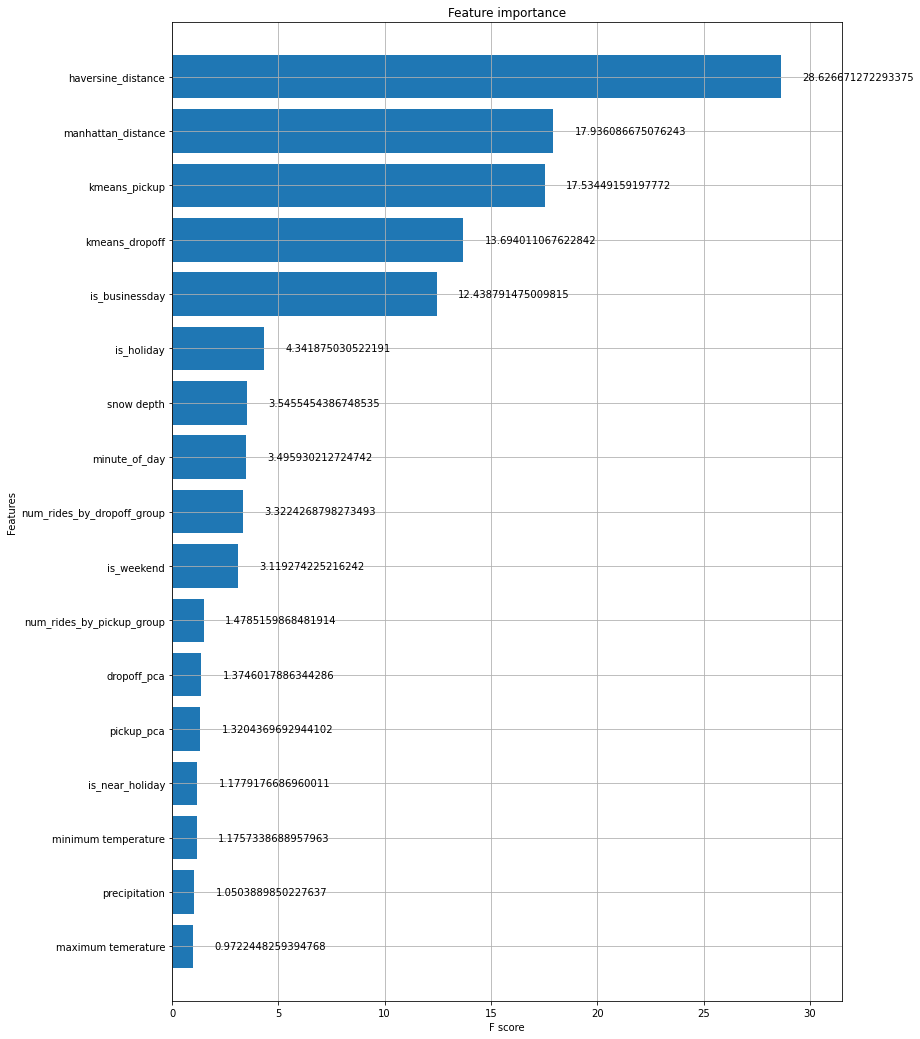

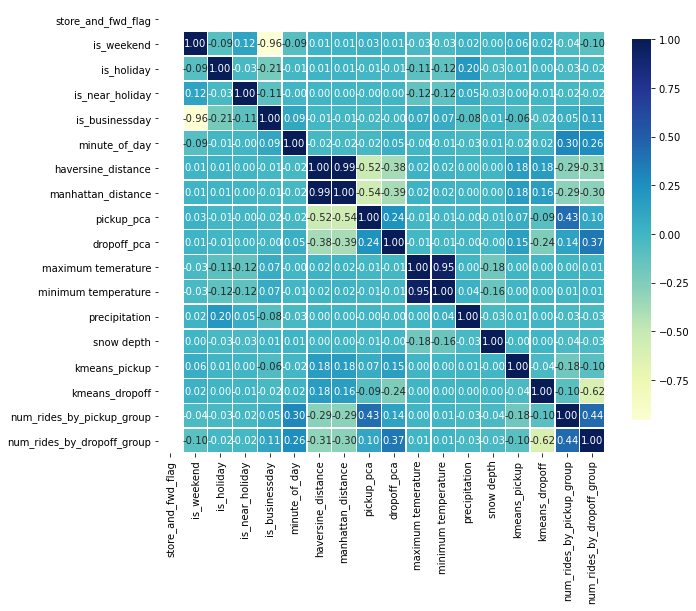

In [20]:
print_xgb_metric(model_xgb)
correlation_heatmap(train_df)

In [21]:
plot_tree(model_xgb, './plot/xgboost_test_tree.pdf')
plot_tree(model_xgb, './plot/xgboost_test_tree.png')
plot_tree(model_xgb, './plot/xgboost_test_tree_LR.pdf', 'LR')
plot_tree(model_xgb, './plot/xgboost_test_tree_LR.png', 'LR')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.778018 to fit


In [22]:
!ls -l './plot'

total 8676
-rw-rw-r-- 1 ubuntu ubuntu  105614 Jan 12 23:53 xgboost_test_tree.pdf
-rw-rw-r-- 1 ubuntu ubuntu 2427048 Jan 12 23:53 xgboost_test_tree.png
-rw-rw-r-- 1 ubuntu ubuntu  106564 Jan 12 23:53 xgboost_test_tree_LR.pdf
-rw-rw-r-- 1 ubuntu ubuntu 6237047 Jan 12 23:53 xgboost_test_tree_LR.png


In [25]:
pred_xgb = model_xgb.predict(dtest)
pred_xgb = np.exp(pred_xgb)
print('Test shape OK.') if nyc_taxi_test_df.shape[0] == pred_xgb.shape[0] else print('Oops')
pred_xgb

Test shape OK.


array([ 686.6313,  675.3188,  317.2502, ..., 1221.8033, 1466.1681,
       1228.759 ], dtype=float32)

In [26]:
nyc_taxi_test_df.reset_index(inplace=True)

In [27]:
nyc_taxi_test_df['trip_duration'] = pred_xgb
submission_xgb = nyc_taxi_test_df[['id', 'trip_duration']]
submission_xgb.to_csv('./output/submission-xgb.csv',index=False)

In [29]:
!kaggle competitions submit -c nyc-taxi-trip-duration -f ./output/submission-xgb.csv -m "submission_xgb"

100%|██████████████████████████████████████| 11.7M/11.7M [00:00<00:00, 15.6MB/s]
Successfully submitted to New York City Taxi Trip Duration

In [30]:
end = perf_counter()
print(f'Notebook Total time: {end - start:0.4f} seconds')

Notebook Total time: 27761.9773 seconds
